___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [4]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [5]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
# !pip install optuna

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

import optuna
from keras.api._v2.keras import regularizers
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [8]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [9]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Wed Nov  1 08:50:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [11]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                     y,
                                                     test_size=0.15,
                                                     stratify=y,
                                                     random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [14]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_val)} images in the test dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 53550 images in the training dataset
There are 5950 images in the test dataset
There are 10500 images in the test dataset


In [15]:
# Checking the shape of one image
X_train[30].shape

(28, 28)

In [16]:
y_train.shape, y_val.shape, y_test.shape

((53550,), (5950,), (10500,))

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5355, 5355, 5355, 5355, 5355, 5355, 5355, 5355, 5355, 5355]))

In [18]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([595, 595, 595, 595, 595, 595, 595, 595, 595, 595]))

In [19]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1050, 1050, 1050, 1050, 1050, 1050, 1050, 1050, 1050, 1050]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [20]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

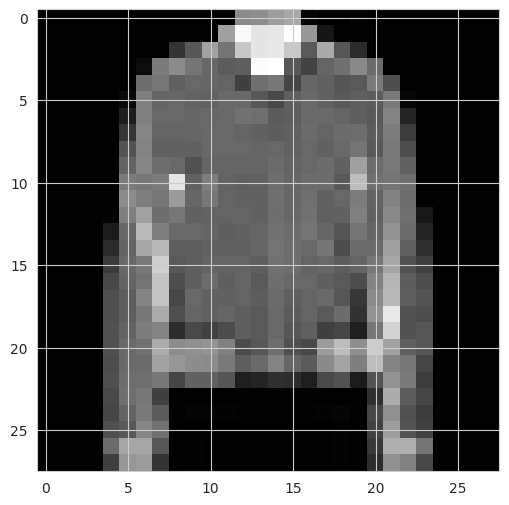

In [21]:
plt.imshow(X_train[20], cmap="gray")

In [22]:
y_train[20]

4

In [23]:
classes[y_train[20]]

'Coat'

<Axes: >

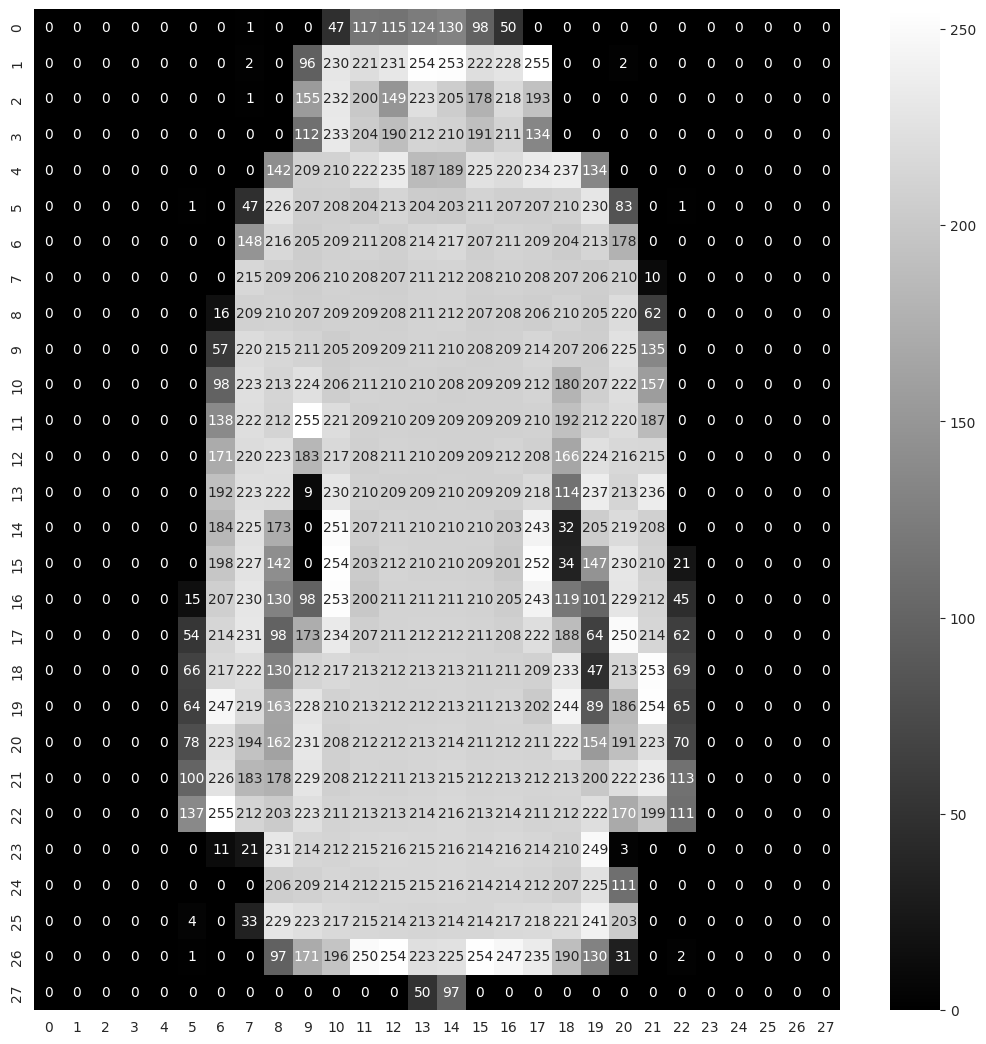

In [24]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[30], annot=True, cmap="gray", fmt=".3g")

In [25]:
len(X_train[30])

28

In [26]:
y_train

array([0, 4, 3, ..., 1, 2, 6], dtype=uint8)

In [27]:
y_train[30]

4

In [28]:
classes [y_train[30]]

'Coat'

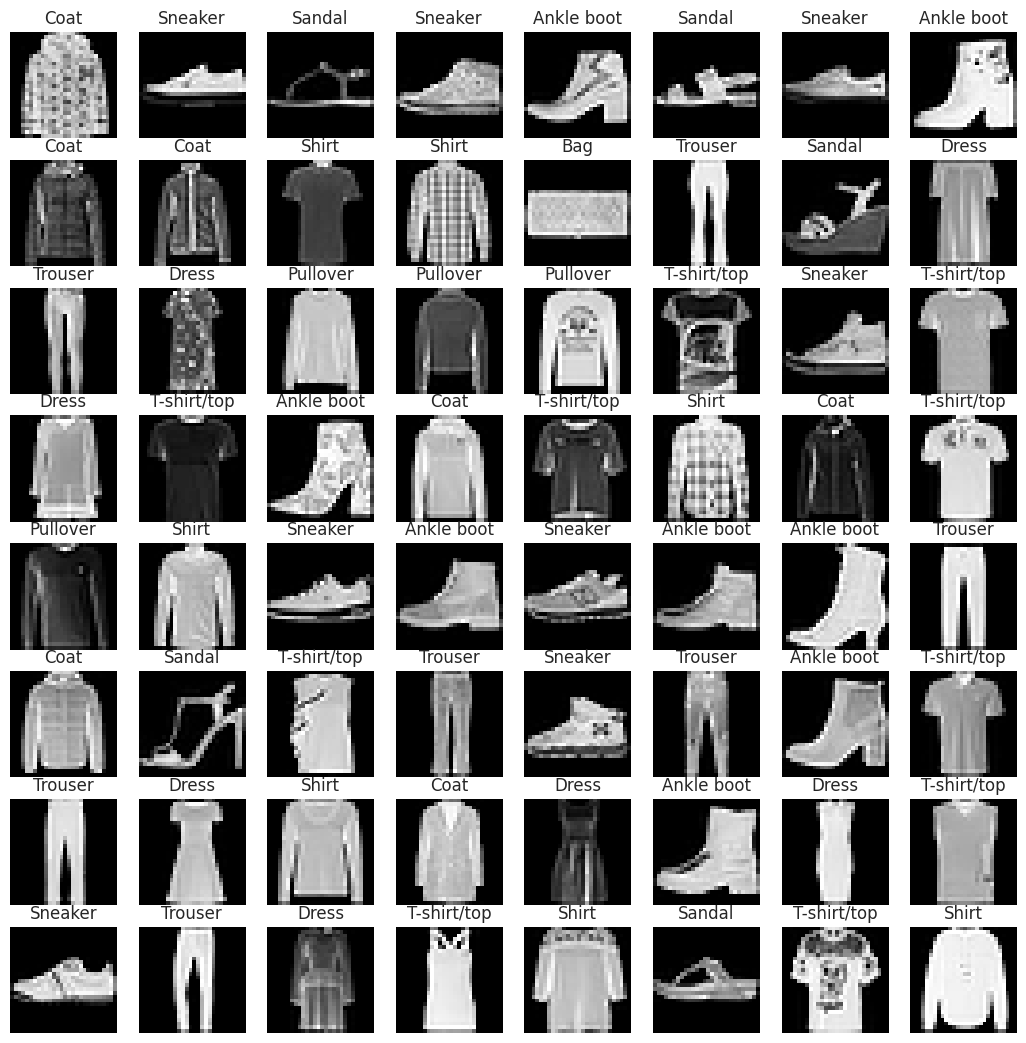

In [29]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [30]:
X_train[0].min()

0

In [31]:
X_train[0].max()

255

In [32]:
# Normalize image pixels
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_val /= 255
X_test /= 255

In [33]:
X_train[0].max()

1.0

In [34]:
X_train[0].min()

0.0

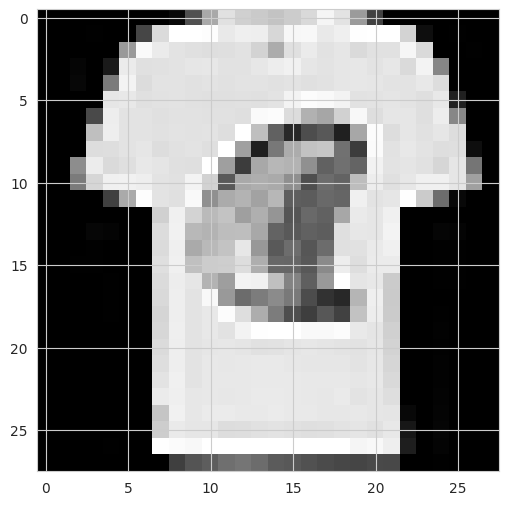

In [35]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [36]:
X_train.shape,  X_val.shape, X_test.shape

((53550, 28, 28), (5950, 28, 28), (10500, 28, 28))

In [37]:
np.expand_dims(X_train, 3).shape

(53550, 28, 28, 1)

In [38]:
X_train = np.expand_dims(X_train, 3)
X_val = np.expand_dims(X_val, 3)
X_test = np.expand_dims(X_test, 3)

In [39]:
X_train.shape, X_val.shape, X_test.shape

((53550, 28, 28, 1), (5950, 28, 28, 1), (10500, 28, 28, 1))

In [40]:
y_train, y_val, y_test

(array([0, 4, 3, ..., 1, 2, 6], dtype=uint8),
 array([6, 1, 0, ..., 0, 4, 8], dtype=uint8),
 array([5, 4, 5, ..., 5, 8, 9], dtype=uint8))

In [41]:
y_train.shape , y_val.shape, y_test.shape

((53550,), (5950,), (10500,))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [42]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)

In [43]:
Y_train.shape , Y_val.shape, Y_test.shape

((53550, 10), (5950, 10), (10500, 10))

In [44]:
y_train[0]

0

In [45]:
classes[y_train[0]]

'T-shirt/top'

In [46]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling-1

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [156]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)
model_1.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_1.add(Flatten())

model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(10, activation="softmax"))

model_1.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [157]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 17500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2240128   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [165]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [166]:
model_1.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
)

Epoch 1/30
1688/1688 [==============================] - 68s 40ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.6216 - val_accuracy: 0.9178
Epoch 2/30
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.6356 - val_accuracy: 0.9150
Epoch 3/30
1688/1688 [==============================] - 68s 40ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.6944 - val_accuracy: 0.9162
Epoch 4/30
1688/1688 [==============================] - 68s 41ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.7299 - val_accuracy: 0.9230
Epoch 5/30
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.7991 - val_accuracy: 0.9145
Epoch 6/30
1688/1688 [==============================] - 70s 41ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.7682 - val_accuracy: 0.9230
Epoch 7/30
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.8003 -

In [167]:
#save the model
model_1.save("CNN_model_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [168]:
X_train.shape, X_val.shape, Y_train.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10))

In [169]:
summary = pd.DataFrame(model_1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.012,0.996,0.622,0.918
1,0.012,0.996,0.636,0.915
2,0.011,0.997,0.694,0.916
3,0.009,0.997,0.730,0.923
4,0.008,0.997,0.799,0.914


**TASK 7: Plot values of metrics you used in your model.**

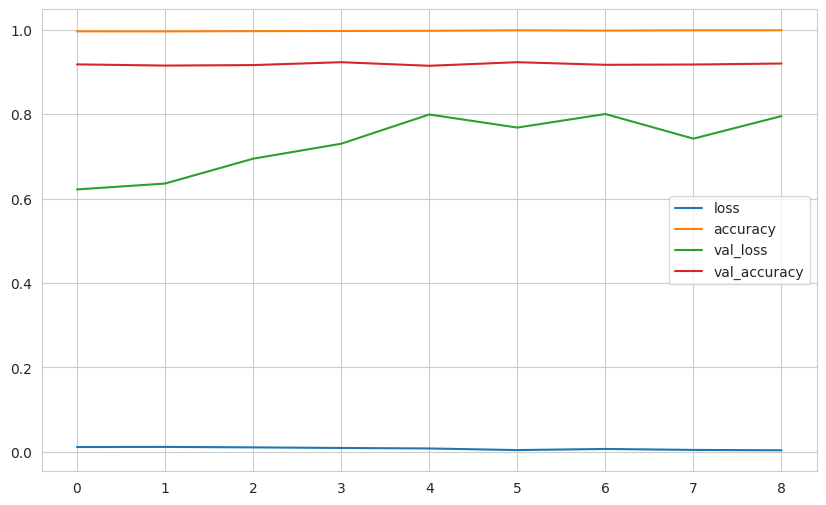

In [170]:
summary.plot();

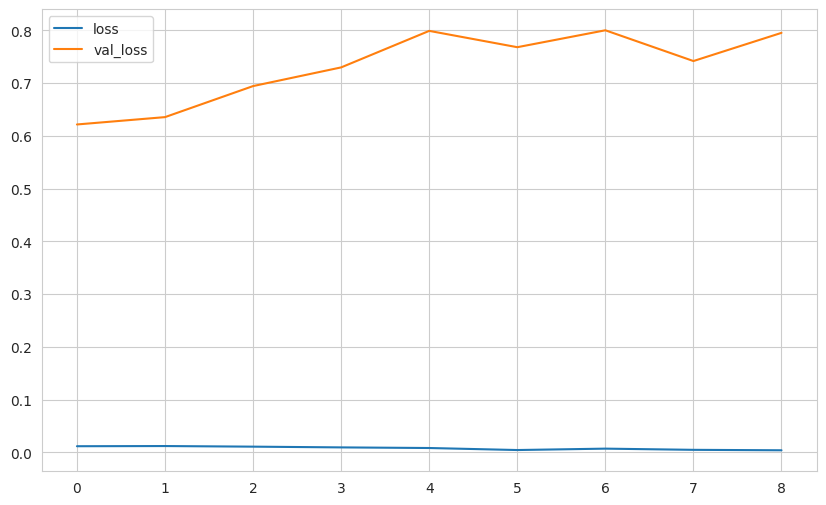

In [171]:
summary[["loss", "val_loss"]].plot();

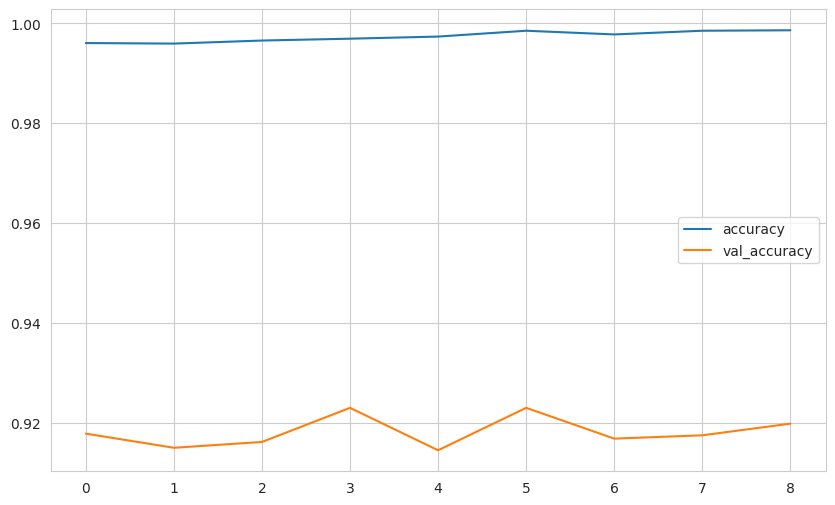

In [172]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [173]:
model_1.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8231 - accuracy: 0.9148


[0.8231284022331238, 0.9147999882698059]

In [174]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8231284022331238
Test accuracy: 0.9147999882698059


In [175]:
pred_prob = model_1.predict(X_test)
pred_prob

313/313 [==============================] - 4s 13ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13351838, 0.00015726,
        0.0000024 ]], dtype=float32)

In [176]:
pred_prob.shape

(10000, 10)

In [177]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [178]:
np.argmax(pred_prob[0])

9

In [179]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [180]:
y_pred.shape

(10000,)

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.86      0.87      1000
           3       0.92      0.90      0.91      1000
           4       0.82      0.90      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [182]:
print(confusion_matrix(y_test, y_pred))

[[862   1  17  11   5   2  95   1   6   0]
 [  2 975   0  16   4   0   0   0   3   0]
 [ 15   1 865   8  69   0  40   0   2   0]
 [ 19   6   8 901  40   2  23   0   1   0]
 [  1   1  55  14 899   1  28   0   1   0]
 [  0   0   0   1   0 982   0  12   0   5]
 [109   0  49  22  71   0 739   0   9   1]
 [  0   0   0   0   0   8   0 979   0  13]
 [  2   1   3   5   3   2   4   2 978   0]
 [  0   0   0   0   0   4   0  28   0 968]]


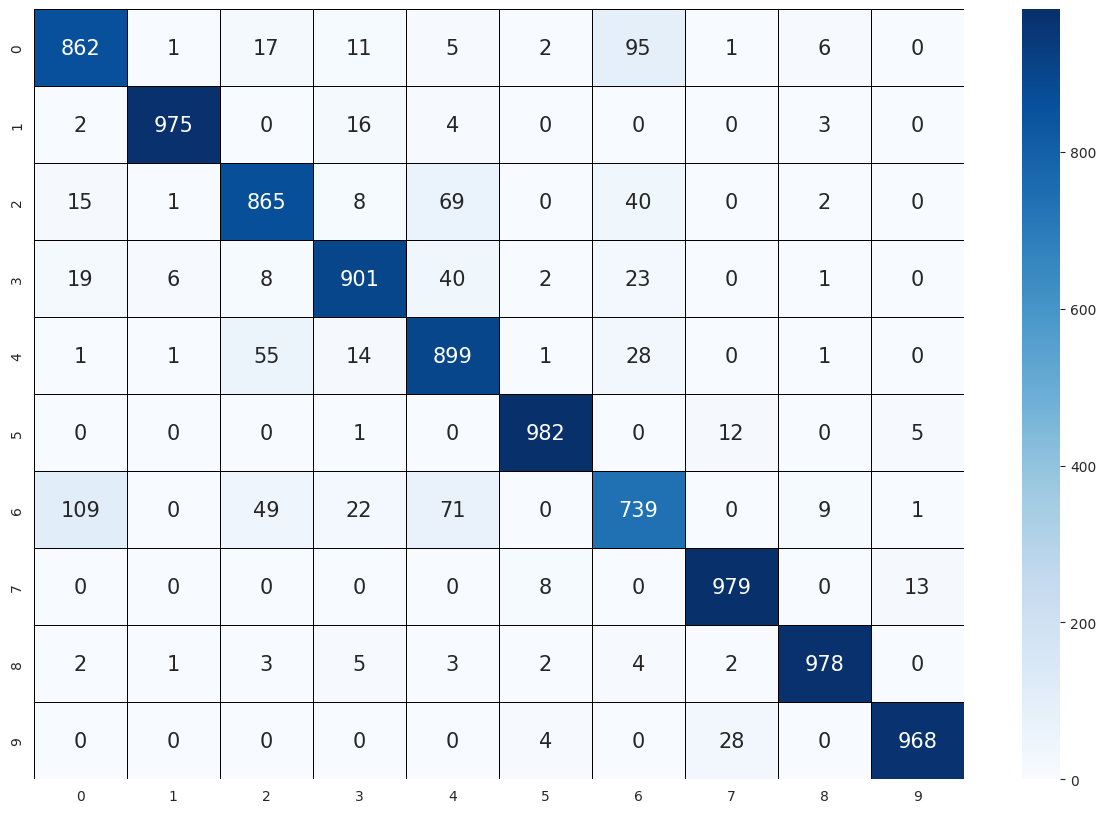

In [183]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [184]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [185]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

852

In [186]:
np.equal(y_test, y_pred).sum()

9148

In [200]:
model_1_acc = score[1]
model_1_loss = score[0]
print("Results of the Model_1:")
print(f"Accuracy: {model_1_acc}, Loss: {model_1_loss}")


Results of the Model_1:
Accuracy: 0.9147999882698059, Loss: 0.8231284022331238


# Modeling-2

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [201]:
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)

model_2.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_2.add(Flatten())

model_2.add(Dense(128, activation="relu"))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(10, activation="softmax"))

model_2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [202]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2240128   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [203]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [204]:
model_2.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
)

Epoch 1/30
1688/1688 [==============================] - 80s 47ms/step - loss: 0.4020 - accuracy: 0.8564 - val_loss: 0.2776 - val_accuracy: 0.8973
Epoch 2/30
1688/1688 [==============================] - 93s 55ms/step - loss: 0.2654 - accuracy: 0.9036 - val_loss: 0.2487 - val_accuracy: 0.9102
Epoch 3/30
1688/1688 [==============================] - 96s 57ms/step - loss: 0.2223 - accuracy: 0.9184 - val_loss: 0.2422 - val_accuracy: 0.9117
Epoch 4/30
1688/1688 [==============================] - 92s 55ms/step - loss: 0.1924 - accuracy: 0.9298 - val_loss: 0.2633 - val_accuracy: 0.9130
Epoch 5/30
1688/1688 [==============================] - 85s 50ms/step - loss: 0.1703 - accuracy: 0.9390 - val_loss: 0.3172 - val_accuracy: 0.9018
Epoch 6/30
1688/1688 [==============================] - 92s 55ms/step - loss: 0.1518 - accuracy: 0.9450 - val_loss: 0.2543 - val_accuracy: 0.9120
Epoch 7/30
1688/1688 [==============================] - 100s 59ms/step - loss: 0.1343 - accuracy: 0.9519 - val_loss: 0.2879 

In [261]:
#save the model
model_2.save("CNN_model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [206]:
X_train.shape, X_val.shape, Y_train.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10))

In [207]:
summary = pd.DataFrame(model_2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.402,0.856,0.278,0.897
1,0.265,0.904,0.249,0.910
2,0.222,0.918,0.242,0.912
3,0.192,0.930,0.263,0.913
4,0.170,0.939,0.317,0.902


**TASK 7: Plot values of metrics you used in your model.**

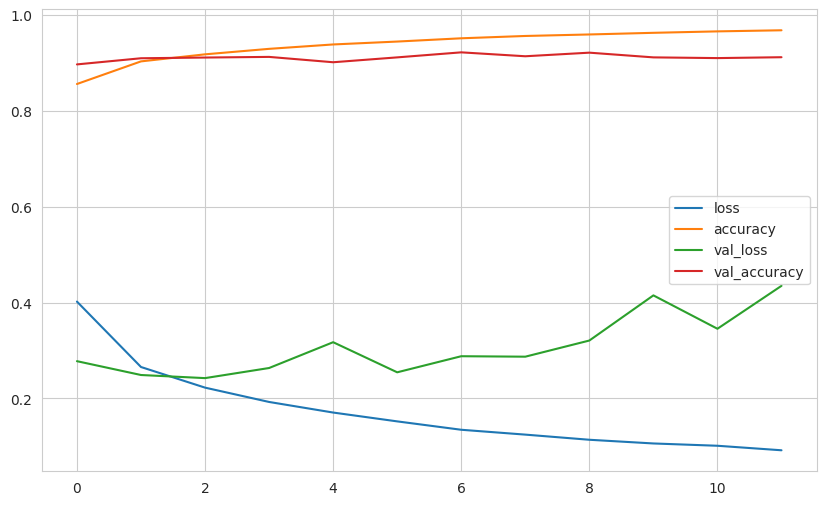

In [208]:
summary.plot();

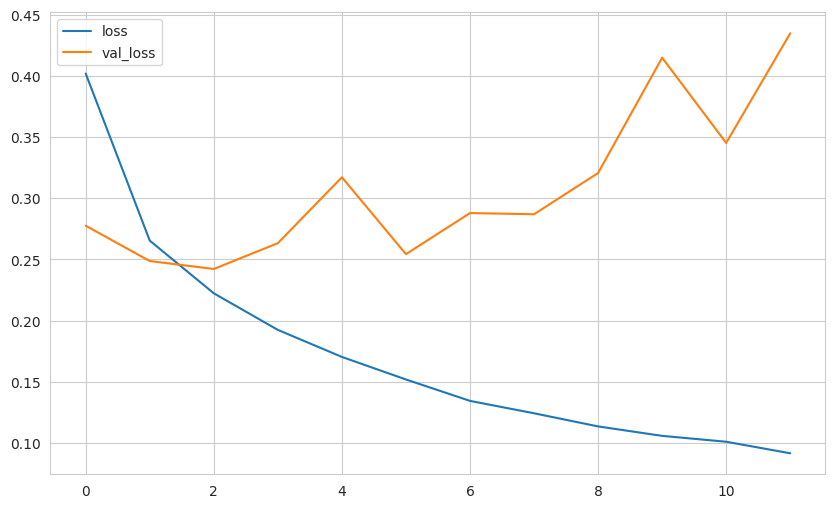

In [209]:
summary[["loss", "val_loss"]].plot();

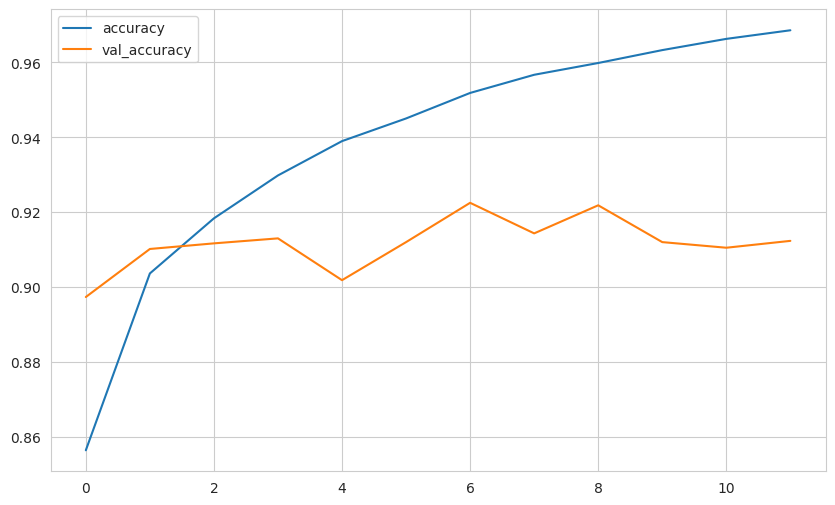

In [210]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [211]:
model_2.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3382 - accuracy: 0.9096


[0.3382249176502228, 0.909600019454956]

In [212]:
score = model_2.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3382249176502228
Test accuracy: 0.909600019454956


In [213]:
pred_prob = model_2.predict(X_test)
pred_prob

313/313 [==============================] - 4s 12ms/step


array([[0.        , 0.        , 0.        , ..., 0.00000095, 0.        ,
        0.99999887],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000691, 0.00000005, 0.00000354, ..., 0.00009424, 0.00001057,
        0.00019361]], dtype=float32)

In [214]:
pred_prob.shape

(10000, 10)

In [215]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00000009, 0.        , 0.00000095, 0.        , 0.99999887],
      dtype=float32)

In [216]:
np.argmax(pred_prob[0])

9

In [217]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [218]:
y_pred.shape

(10000,)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.83      0.87      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.81      0.90      0.85      1000
           5       0.96      0.99      0.98      1000
           6       0.80      0.71      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [220]:
print(confusion_matrix(y_test, y_pred))

[[866   0  26  15   5   3  82   0   3   0]
 [  0 990   1   4   2   0   2   0   1   0]
 [ 15   1 871   4  70   0  38   0   1   0]
 [ 16  10  14 887  53   0  20   0   0   0]
 [  1   2  58  10 898   0  31   0   0   0]
 [  0   0   0   0   0 987   0   7   0   6]
 [105   2  69  26  80   0 713   0   5   0]
 [  0   0   0   0   0  16   0 947   0  37]
 [  4   1   7   3   4   9   5   1 966   0]
 [  1   0   0   0   0   8   1  19   0 971]]


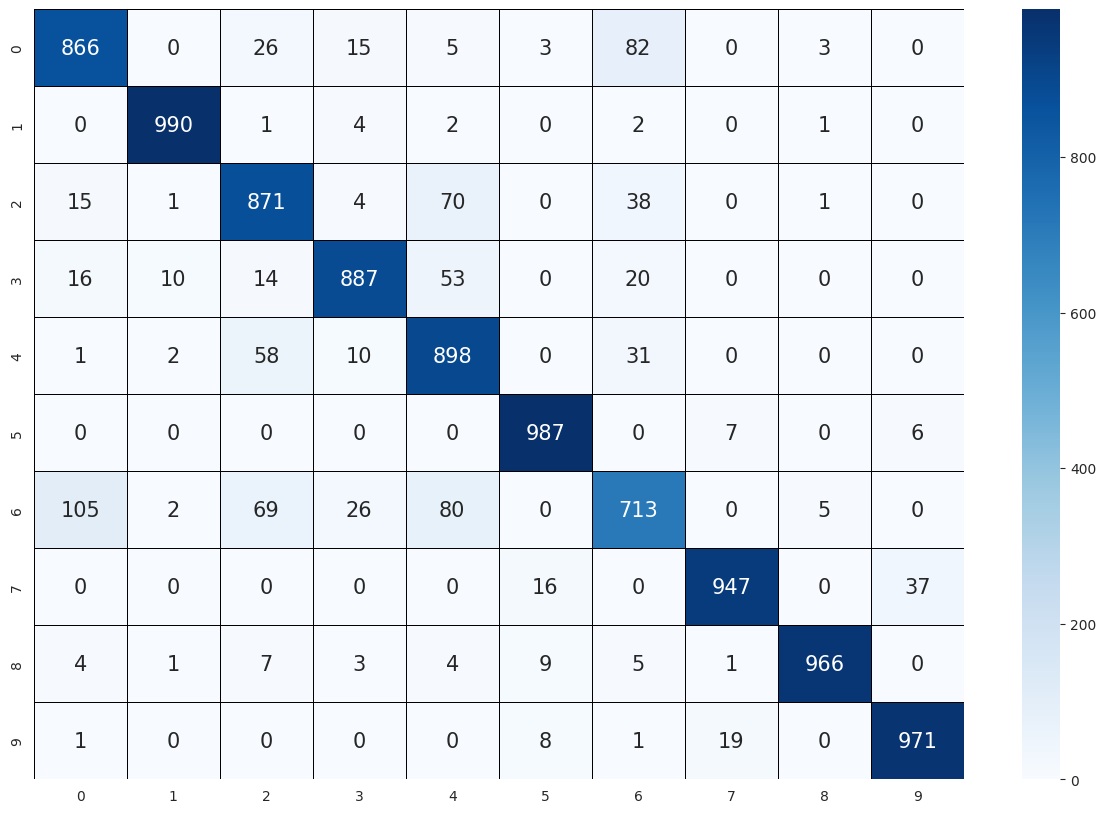

In [221]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [222]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [223]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

904

In [224]:
np.equal(y_test, y_pred).sum()

9096

In [268]:
model_2_acc = score[1]
model_2_loss = score[0]
print("Results of the Model 2:")
print(f"Accuracy: {model_2_acc}, loss: {model_2_loss}")


Results of the Model 2:
Accuracy: 0.909600019454956, loss: 0.3382249176502228


# Modeling-3

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [227]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)

model_3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_3.add(
    Conv2D(
        filters=48,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)

model_3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))


model_3.add(Flatten())

model_3.add(Dense(128, activation="relu"))
model_3.add(Dense(64, activation="relu"))
model_3.add(Dense(10, activation="softmax"))

model_3.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [229]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 48)        12144     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 48)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 23232)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [230]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [231]:
model_3.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
)

Epoch 1/30
1688/1688 [==============================] - 218s 129ms/step - loss: 0.4121 - accuracy: 0.8505 - val_loss: 0.2618 - val_accuracy: 0.9022
Epoch 2/30
1688/1688 [==============================] - 191s 113ms/step - loss: 0.2580 - accuracy: 0.9075 - val_loss: 0.2457 - val_accuracy: 0.9130
Epoch 3/30
1688/1688 [==============================] - 196s 116ms/step - loss: 0.2121 - accuracy: 0.9227 - val_loss: 0.2263 - val_accuracy: 0.9177
Epoch 4/30
1688/1688 [==============================] - 191s 113ms/step - loss: 0.1827 - accuracy: 0.9338 - val_loss: 0.3410 - val_accuracy: 0.9012
Epoch 5/30
1688/1688 [==============================] - 232s 137ms/step - loss: 0.1605 - accuracy: 0.9417 - val_loss: 0.2965 - val_accuracy: 0.9067
Epoch 6/30
1688/1688 [==============================] - 178s 105ms/step - loss: 0.1439 - accuracy: 0.9476 - val_loss: 0.2701 - val_accuracy: 0.9243
Epoch 7/30
1688/1688 [==============================] - 209s 124ms/step - loss: 0.1291 - accuracy: 0.9550 - val_

In [254]:
#save the model
model_3.save("CNN_model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [233]:
X_train.shape, X_val.shape, Y_train.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10))

In [234]:
summary = pd.DataFrame(model_3.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412,0.850,0.262,0.902
1,0.258,0.908,0.246,0.913
2,0.212,0.923,0.226,0.918
3,0.183,0.934,0.341,0.901
4,0.160,0.942,0.297,0.907


**TASK 7: Plot values of metrics you used in your model.**

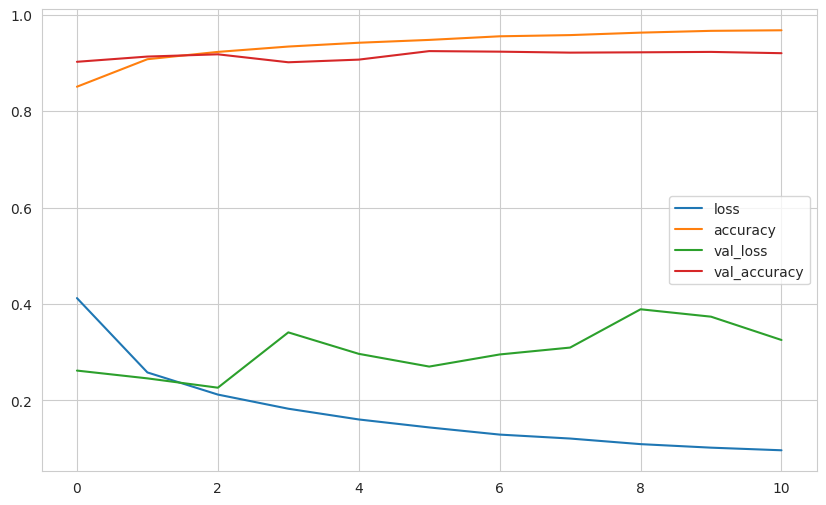

In [235]:
summary.plot();

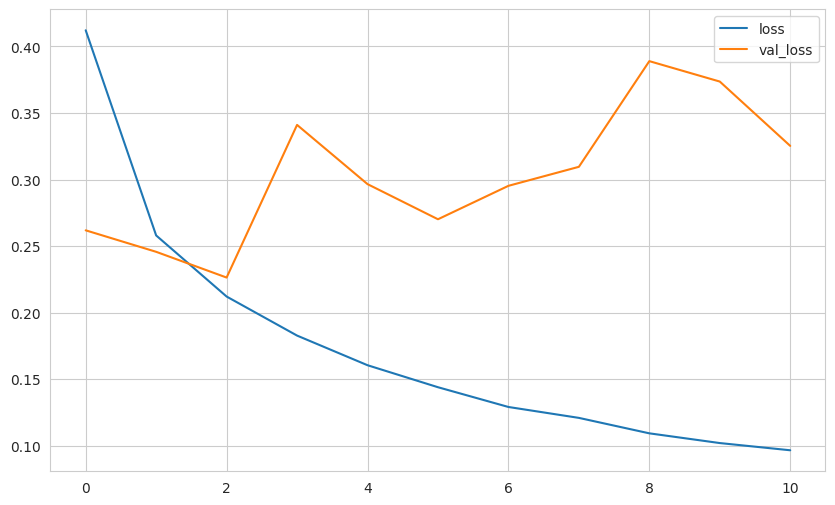

In [236]:
summary[["loss", "val_loss"]].plot();

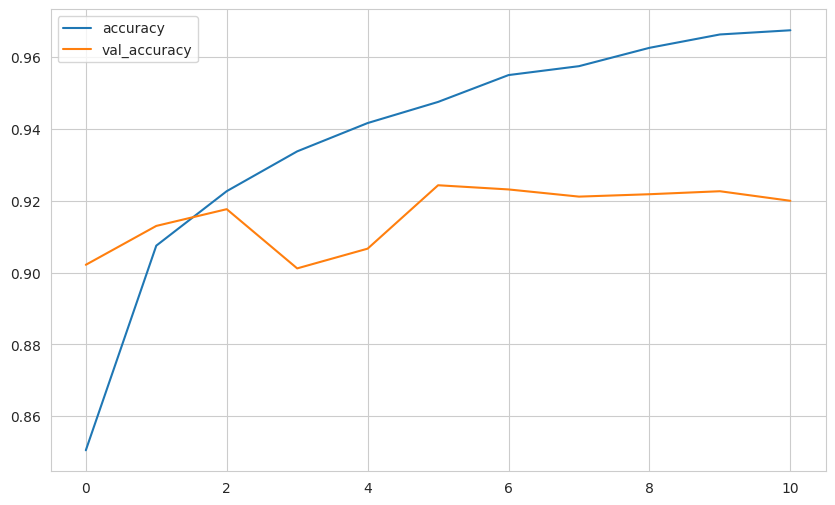

In [237]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [238]:
model_3.evaluate(X_test, Y_test)

313/313 [==============================] - 12s 39ms/step - loss: 0.3193 - accuracy: 0.9118


[0.31925103068351746, 0.9118000268936157]

In [239]:
score = model_3.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31925103068351746
Test accuracy: 0.9118000268936157


In [240]:
pred_prob = model_3.predict(X_test)
pred_prob

313/313 [==============================] - 8s 25ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000001, 0.        , 0.        , ..., 0.00002673, 0.0000009 ,
        0.00000006]], dtype=float32)

In [241]:
pred_prob.shape

(10000, 10)

In [242]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00000002, 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [243]:
np.argmax(pred_prob[0])

9

In [244]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [245]:
y_pred.shape

(10000,)

In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.92      0.91      0.92      1000
           4       0.87      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.79      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [247]:
print(confusion_matrix(y_test, y_pred))

[[875   0  15  14   2   3  87   0   4   0]
 [  1 977   0  16   2   0   2   0   2   0]
 [ 15   0 858   6  49   0  71   0   1   0]
 [ 10   6  11 909  37   0  26   0   1   0]
 [  1   0  60  16 809   0 114   0   0   0]
 [  0   0   0   0   0 984   0  12   0   4]
 [ 91   0  52  23  35   1 790   0   8   0]
 [  0   0   0   0   0   9   0 964   0  27]
 [  4   0   2   1   1   3   4   3 982   0]
 [  0   0   1   0   0   6   1  22   0 970]]


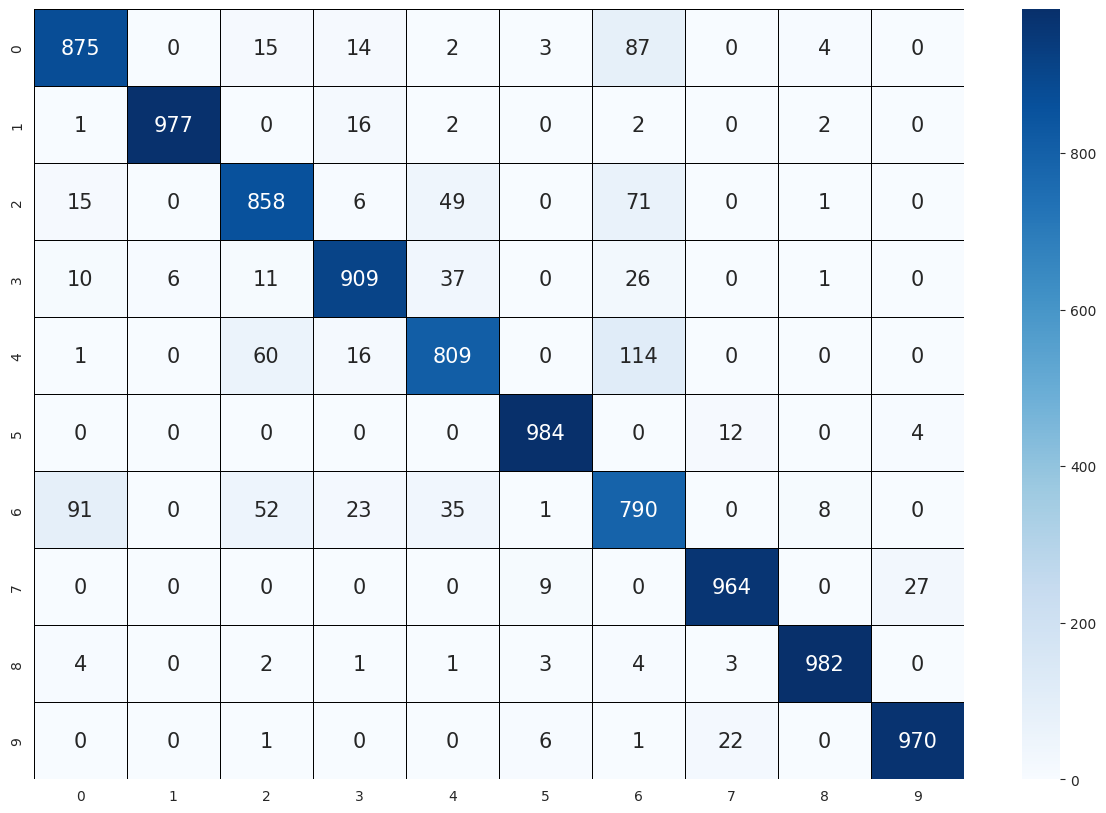

In [248]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [249]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [250]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

882

In [251]:
np.equal(y_test, y_pred).sum()

9118

In [255]:
model_3_acc = score[1]
model_3_loss = score[0]
print("Results of the Model 3:")
print(f"Accuracy: {model_3_acc}, loss: {model_3_loss}")


Results of the Model 3:
Accuracy: 0.9118000268936157, loss: 0.31925103068351746


# Modeling-4

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [269]:
tf.random.set_seed(42)

model_4 = Sequential()

model_4.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)
model_4.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_4.add(Dropout(0.3))

model_4.add(
    Conv2D(
        filters=48,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)
model_4.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_4.add(Dropout(0.3))

model_4.add(Flatten())

model_4.add(Dense(128, activation="relu"))
model_4.add(Dense(64, activation="relu"))
model_4.add(Dense(10, activation="softmax"))

model_4.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [271]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 48)        12144     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 48)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 48)       

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [272]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [273]:
model_4.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
)

Epoch 1/30
1688/1688 [==============================] - 191s 113ms/step - loss: 0.4300 - accuracy: 0.8441 - val_loss: 0.2971 - val_accuracy: 0.8867
Epoch 2/30
1688/1688 [==============================] - 183s 109ms/step - loss: 0.2834 - accuracy: 0.8977 - val_loss: 0.2597 - val_accuracy: 0.9080
Epoch 3/30
1688/1688 [==============================] - 278s 165ms/step - loss: 0.2496 - accuracy: 0.9085 - val_loss: 0.2685 - val_accuracy: 0.9025
Epoch 4/30
1688/1688 [==============================] - 278s 165ms/step - loss: 0.2308 - accuracy: 0.9169 - val_loss: 0.2258 - val_accuracy: 0.9165
Epoch 5/30
1688/1688 [==============================] - 284s 168ms/step - loss: 0.2219 - accuracy: 0.9197 - val_loss: 0.2373 - val_accuracy: 0.9155
Epoch 6/30
1688/1688 [==============================] - 236s 140ms/step - loss: 0.2126 - accuracy: 0.9237 - val_loss: 0.2353 - val_accuracy: 0.9188
Epoch 7/30
1688/1688 [==============================] - 194s 115ms/step - loss: 0.2060 - accuracy: 0.9269 - val_

In [274]:
#save the model
model_4.save("CNN_model_4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [275]:
X_train.shape, X_val.shape, Y_train.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10))

In [276]:
summary = pd.DataFrame(model_4.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.430,0.844,0.297,0.887
1,0.283,0.898,0.260,0.908
2,0.250,0.909,0.268,0.902
3,0.231,0.917,0.226,0.916
4,0.222,0.920,0.237,0.915


**TASK 7: Plot values of metrics you used in your model.**

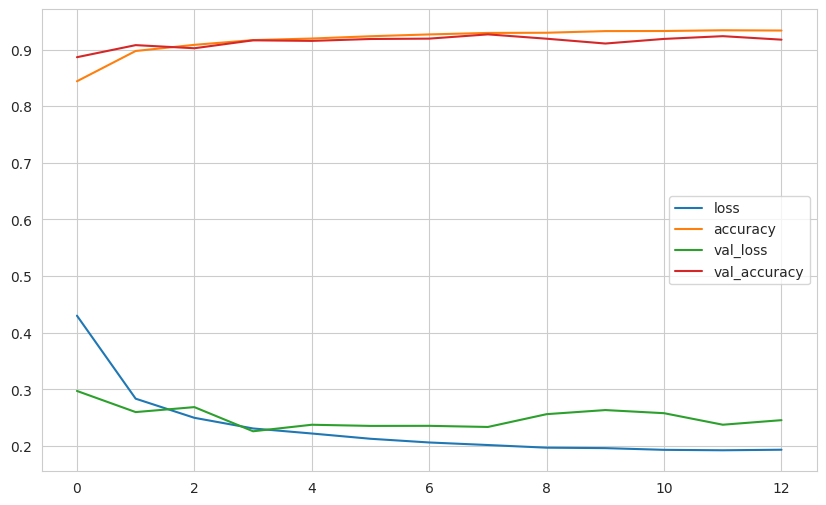

In [277]:
summary.plot();

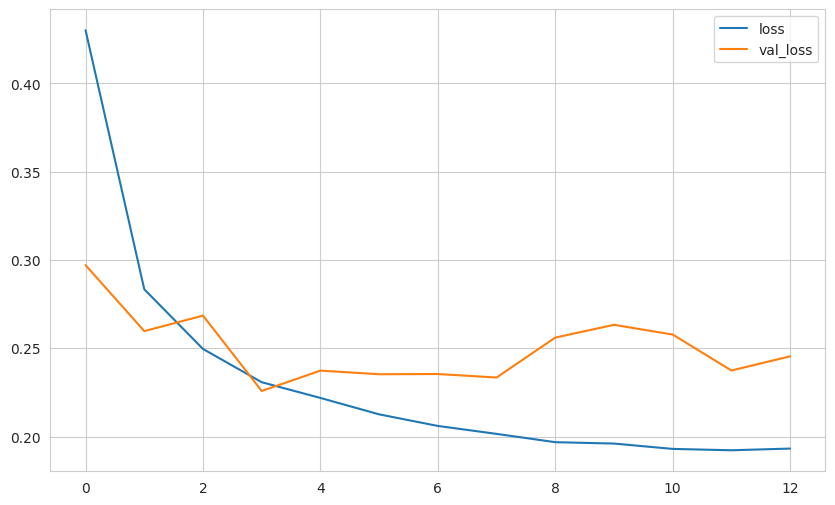

In [278]:
summary[["loss", "val_loss"]].plot();

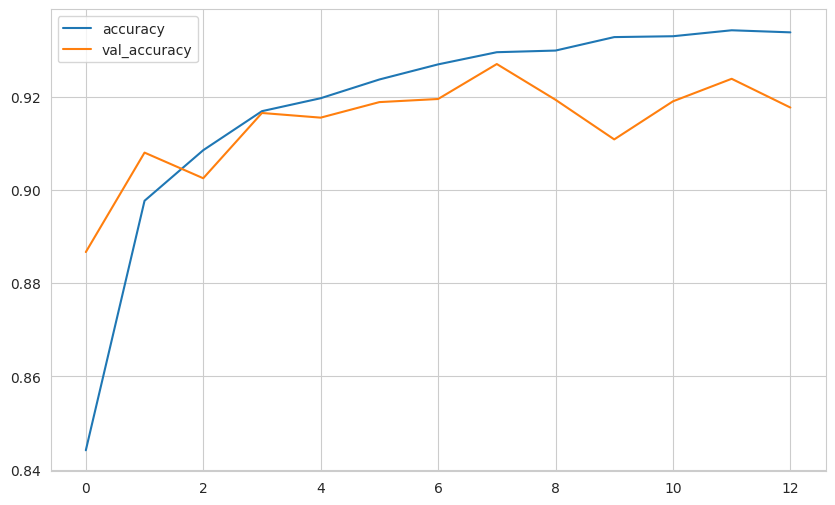

In [279]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [280]:
model_4.evaluate(X_test, Y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.2600 - accuracy: 0.9150


[0.25996512174606323, 0.9150000214576721]

In [281]:
score = model_4.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25996512174606323
Test accuracy: 0.9150000214576721


In [282]:
pred_prob = model_4.predict(X_test)
pred_prob

313/313 [==============================] - 6s 19ms/step


array([[0.        , 0.        , 0.        , ..., 0.00009947, 0.        ,
        0.9998486 ],
       [0.00016496, 0.        , 0.99218833, ..., 0.00000012, 0.00000013,
        0.        ],
       [0.00000173, 0.9999934 , 0.00000021, ..., 0.        , 0.00000002,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.9999998 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00053365, 0.00006474, 0.00163483, ..., 0.12660895, 0.03088347,
        0.02506158]], dtype=float32)

In [283]:
pred_prob.shape

(10000, 10)

In [284]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00005206, 0.00000001, 0.00009947, 0.        , 0.9998486 ],
      dtype=float32)

In [285]:
np.argmax(pred_prob[0])

9

In [286]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [287]:
y_pred.shape

(10000,)

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.88      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.86      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.80      0.76      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [289]:
print(confusion_matrix(y_test, y_pred))

[[830   2  23  13   3   1 124   0   4   0]
 [  0 981   0  10   1   0   6   0   2   0]
 [ 15   0 875  10  36   0  63   0   1   0]
 [ 10   3  12 919  21   0  33   0   2   0]
 [  1   0  49  22 860   0  68   0   0   0]
 [  0   0   0   0   0 980   1  10   0   9]
 [ 69   4  45  27  54   0 797   0   4   0]
 [  0   0   0   0   0   9   0 958   0  33]
 [  2   2   5   3   2   2   9   1 974   0]
 [  0   0   0   0   0   4   1  19   0 976]]


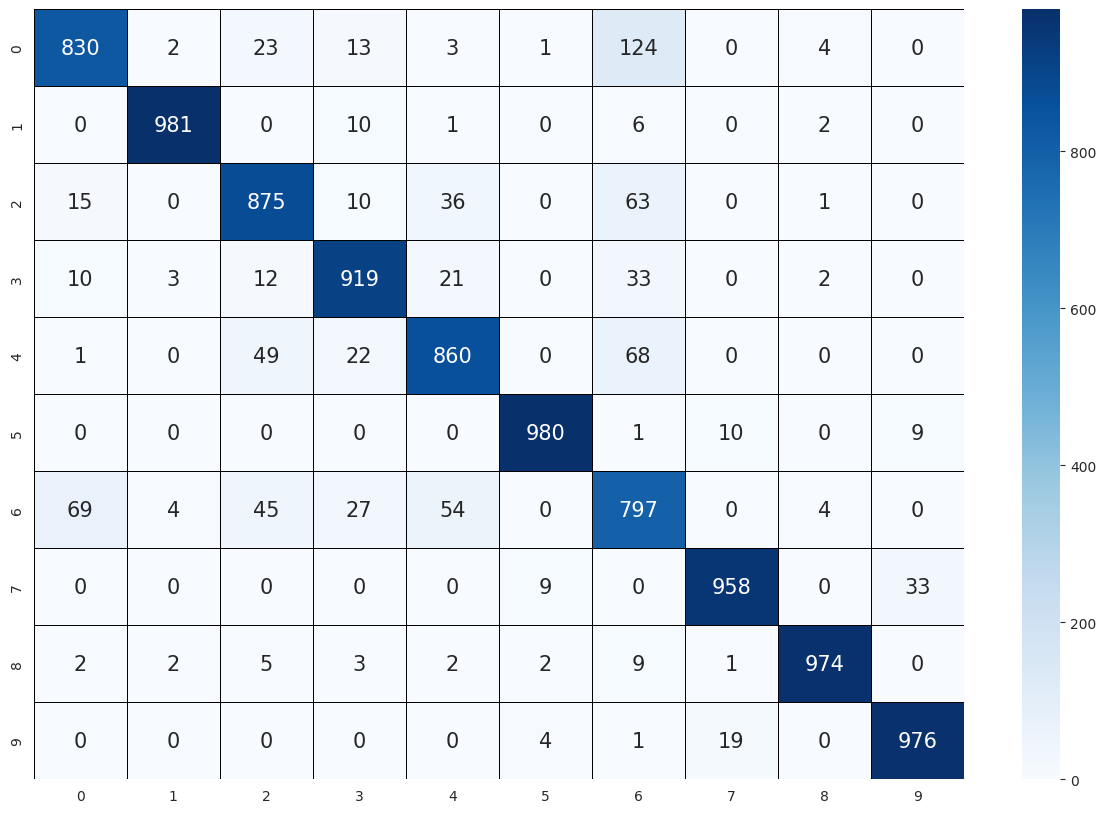

In [290]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [291]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [292]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

850

In [293]:
np.equal(y_test, y_pred).sum()

9150

In [294]:
model_4_acc = score[1]
model_4_loss = score[0]
print("Results of the Model 4:")
print(f"Accuracy: {model_4_acc}, loss: {model_4_loss}")


Results of the Model 4:
Accuracy: 0.9150000214576721, loss: 0.25996512174606323


# Modeling-5

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [82]:
tf.random.set_seed(42)

model_5 = Sequential()

model_5.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)
model_5.add(BatchNormalization())
model_5.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_5.add(Dropout(0.3))

model_5.add(
    Conv2D(
        filters=48,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
    )
)
model_5.add(BatchNormalization())
model_5.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_5.add(Dropout(0.3))

model_5.add(Flatten())

model_5.add(Dense(128, activation="relu"))
model_5.add(Dense(64, activation="relu"))
model_5.add(Dense(10, activation="softmax"))

model_5.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [83]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_22 (Ba  (None, 26, 26, 28)        112       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 25, 25, 28)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 25, 25, 28)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 23, 23, 48)        12144     
                                                                 
 batch_normalization_23 (Ba  (None, 23, 23, 48)      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [84]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [85]:
model_5.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
)

Epoch 1/30
1674/1674 [==============================] - 13s 7ms/step - loss: 0.6306 - accuracy: 0.8284 - val_loss: 0.4315 - val_accuracy: 0.8516
Epoch 2/30
1674/1674 [==============================] - 11s 7ms/step - loss: 0.3513 - accuracy: 0.8819 - val_loss: 0.4354 - val_accuracy: 0.8818
Epoch 3/30
1674/1674 [==============================] - 10s 6ms/step - loss: 0.3133 - accuracy: 0.8947 - val_loss: 0.3396 - val_accuracy: 0.8790
Epoch 4/30
1674/1674 [==============================] - 11s 6ms/step - loss: 0.2920 - accuracy: 0.9020 - val_loss: 0.3146 - val_accuracy: 0.8874
Epoch 5/30
1674/1674 [==============================] - 11s 6ms/step - loss: 0.2784 - accuracy: 0.9052 - val_loss: 0.3401 - val_accuracy: 0.8817
Epoch 6/30
1674/1674 [==============================] - 12s 7ms/step - loss: 0.2635 - accuracy: 0.9106 - val_loss: 0.3161 - val_accuracy: 0.8936
Epoch 7/30
1674/1674 [==============================] - 10s 6ms/step - loss: 0.2544 - accuracy: 0.9132 - val_loss: 0.4626 - val_ac

In [86]:
#save the model
model_5.save("CNN_model_5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
X_train.shape, X_val.shape, Y_train.shape

((53550, 28, 28, 1), (5950, 28, 28, 1), (53550, 10))

In [88]:
summary = pd.DataFrame(model_5.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.631,0.828,0.432,0.852
1,0.351,0.882,0.435,0.882
2,0.313,0.895,0.340,0.879
3,0.292,0.902,0.315,0.887
4,0.278,0.905,0.340,0.882


**TASK 7: Plot values of metrics you used in your model.**

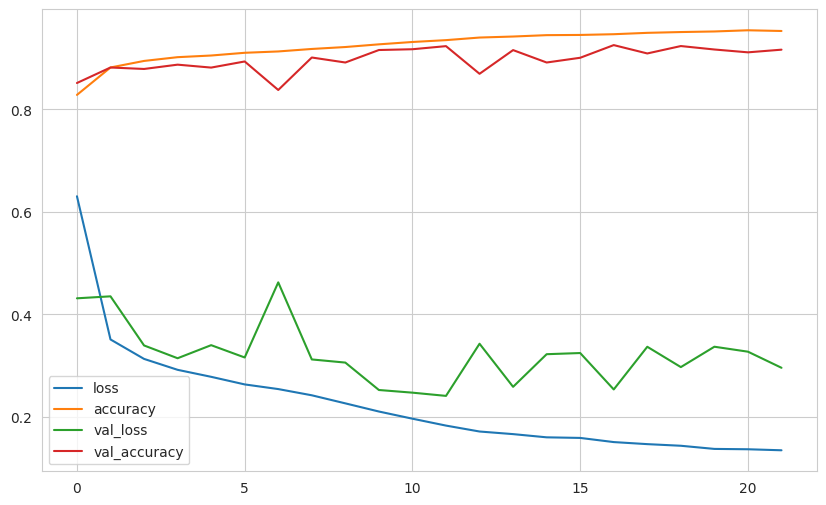

In [89]:
summary.plot();

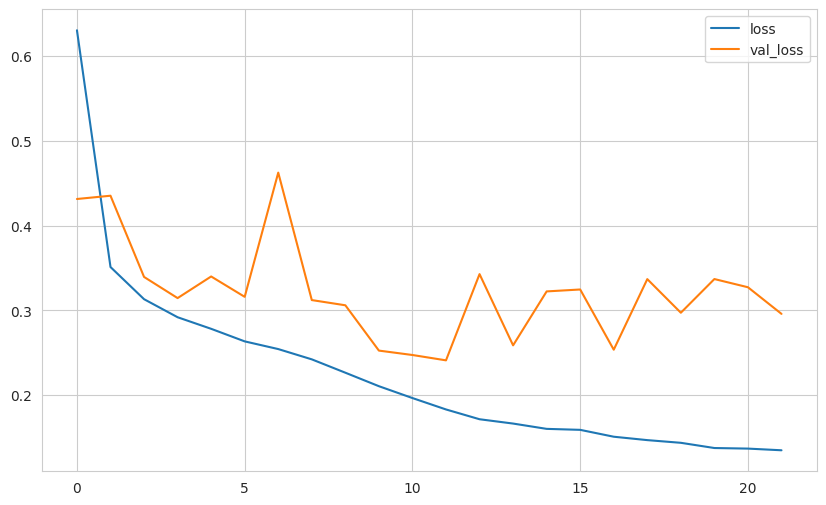

In [90]:
summary[["loss", "val_loss"]].plot();

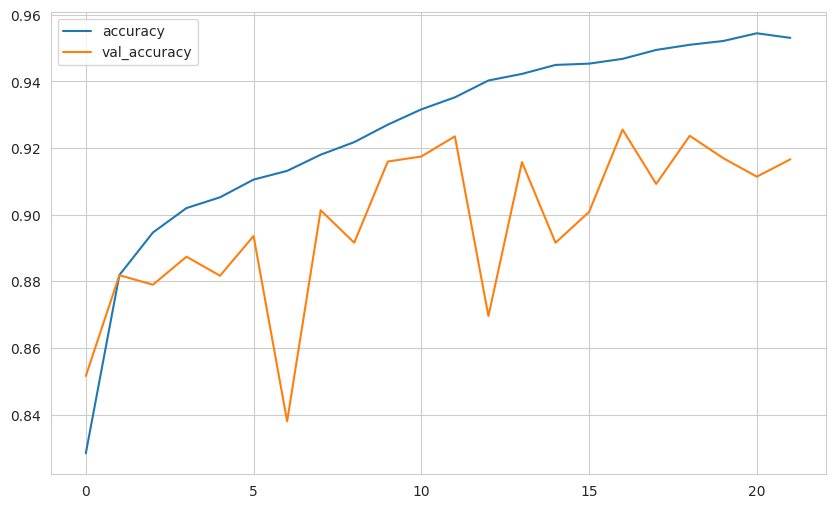

In [91]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [92]:
model_5.evaluate(X_test, Y_test)

329/329 [==============================] - 2s 5ms/step - loss: 0.2844 - accuracy: 0.9208


[0.2843771278858185, 0.9207618832588196]

In [93]:
score = model_5.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2843771278858185
Test accuracy: 0.9207618832588196


In [94]:
pred_prob = model_5.predict(X_test)
pred_prob

329/329 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.00000001,
        0.        ],
       [0.00000026, 0.        , 0.00981597, ..., 0.        , 0.00000004,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00000012, 0.        ,
        0.9999999 ]], dtype=float32)

In [95]:
pred_prob.shape

(10500, 10)

In [96]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.00000001, 0.        ],
      dtype=float32)

In [97]:
np.argmax(pred_prob[0])

5

In [98]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([5, 4, 5, ..., 5, 8, 9])

In [99]:
y_pred.shape

(10500,)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1050
           1       1.00      0.98      0.99      1050
           2       0.82      0.92      0.87      1050
           3       0.89      0.94      0.92      1050
           4       0.93      0.82      0.87      1050
           5       0.99      0.98      0.98      1050
           6       0.79      0.75      0.77      1050
           7       0.96      0.98      0.97      1050
           8       0.99      0.98      0.98      1050
           9       0.97      0.97      0.97      1050

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



In [101]:
print(confusion_matrix(y_test, y_pred))

[[ 930    0   22   23    0    0   67    0    8    0]
 [   0 1030    2   14    1    0    3    0    0    0]
 [   9    0  969    8   25    0   39    0    0    0]
 [  12    2   15  987    7    0   26    0    1    0]
 [   3    0   73   37  862    0   74    0    1    0]
 [   0    0    0    0    0 1024    0   14    2   10]
 [ 101    3   92   35   27    1  789    0    2    0]
 [   0    0    0    0    0    5    0 1027    0   18]
 [   5    0    2    2    0    1    6    1 1033    0]
 [   0    0    0    0    0    2    0   30    1 1017]]


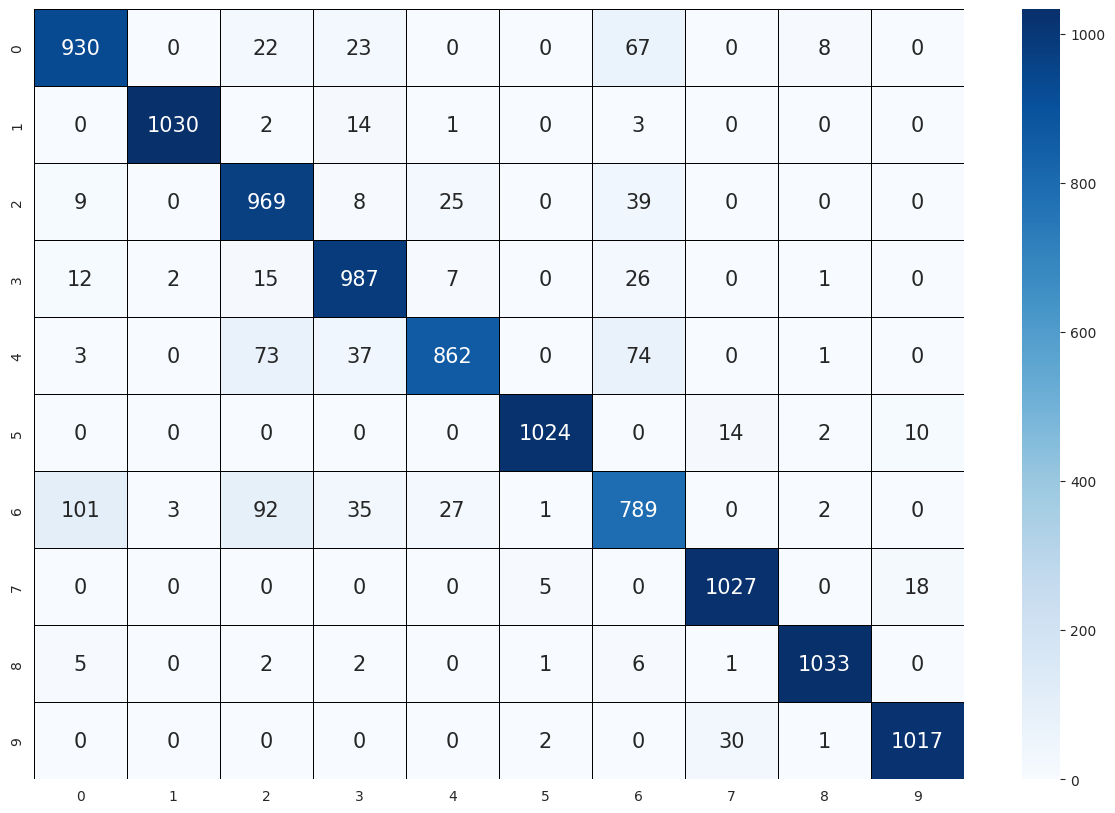

In [102]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [103]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [104]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

832

In [105]:
np.equal(y_test, y_pred).sum()

9668

In [106]:
model_5_acc = score[1]
model_5_loss = score[0]
print("Results of the Model 5:")
print(f"Accuracy: {model_5_acc}, loss: {model_5_loss}")


Results of the Model 5:
Accuracy: 0.9207618832588196, loss: 0.2843771278858185


# Modeling-6

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [47]:
batch_size = 32
trial_metric = "accuracy"

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_filt= trial.suggest_int("n_filt2", 28, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    act = trial.suggest_categorical("activation", ["relu", "sigmoid"])
    LR = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
    l1_lambda = trial.suggest_float("l1_lambda", 1e-6, 1e-1, log=True)
    l2_lambda = trial.suggest_float("l2_lambda", 1e-6, 1e-1, log=True)


    tf.random.set_seed(42)
    model = Sequential()
    model.add(
        Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
        bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
        ))


    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(Dropout(0.3))

    model.add(
        Conv2D(
            filters=n_filt,
            kernel_size=(3, 3), # feature detector. filter
            input_shape=(28, 28, 1),
            activation=act,
            padding="valid",
            strides=(1, 1),
            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
            bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
         )
    )
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(128, activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
                   bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
        ))
    model.add(Dense(n_units2, activation=act,
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
               bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
    ))

    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=LR), metrics=["accuracy"])

    return model


In [48]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [52]:
def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 10)
    w1 = trial.suggest_loguniform("w1", 0.01, 10)
    w2 = trial.suggest_loguniform("w2", 0.01, 10)
    w3 = trial.suggest_loguniform("w3", 0.01, 10)
    w4 = trial.suggest_loguniform("w4", 0.01, 10)
    w5 = trial.suggest_loguniform("w5", 0.01, 10)
    w6 = trial.suggest_loguniform("w6", 0.01, 10)
    w7 = trial.suggest_loguniform("w7", 0.01, 10)
    w8 = trial.suggest_loguniform("w8", 0.01, 10)
    w9 = trial.suggest_loguniform("w9", 0.01, 10)

    model.fit(
        X_train,
        Y_train,
        validation_data=(X_val, Y_val),
        batch_size=batch_size,
        epochs=30,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1, 2: w2, 3: w3, 4: w4, 5: w5, 6: w6, 7: w7, 8: w8, 9: w9},
        verbose=0,
    )
    score = model.evaluate(X_test, Y_test, verbose=0)[1]
    return score

In [53]:
optuna_study = optuna.create_study(direction="maximize")
optuna_study.optimize(objective, n_trials=5)

[I 2023-11-01 09:06:07,906] A new study created in memory with name: no-name-ca2feb2b-6d94-4356-b8b3-c8aad55e7e66
<ipython-input-47-644e0754adfe>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  LR = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
<ipython-input-52-62d9f4e9880d>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w0 = trial.suggest_loguniform("w0", 0.01, 10)
<ipython-input-52-62d9f4e9880d>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w1 = trial.suggest_loguniform("w1", 0.01, 10)
<ipytho

In [55]:
optuna_study.best_params

{'n_filt2': 74,
 'n_units2': 67,
 'activation': 'relu',
 'learning_rate': 0.0005213771080817296,
 'l1_lambda': 0.00015270940589569006,
 'l2_lambda': 0.0003846758212447612,
 'w0': 0.02277762415995569,
 'w1': 0.106660164242876,
 'w2': 0.011387314611164904,
 'w3': 0.3386255870389764,
 'w4': 0.14471826146478192,
 'w5': 7.740134012590085,
 'w6': 0.10411976083474163,
 'w7': 0.02019587075205123,
 'w8': 0.5100958766880573,
 'w9': 0.03931269045710489}

In [57]:
# build model with optuna parameters
n_filt, n_units, activation, lr,l1_lambda, l2_lambda, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9 = (
    optuna_study.best_params["n_filt2"],
    optuna_study.best_params["n_units2"],
    optuna_study.best_params["activation"],
    optuna_study.best_params["learning_rate"],
    optuna_study.best_params["l1_lambda"],
    optuna_study.best_params["l2_lambda"],
    optuna_study.best_params["w0"],
    optuna_study.best_params["w1"],
    optuna_study.best_params["w2"],
    optuna_study.best_params["w3"],
    optuna_study.best_params["w4"],
    optuna_study.best_params["w5"],
    optuna_study.best_params["w6"],
    optuna_study.best_params["w7"],
    optuna_study.best_params["w8"],
    optuna_study.best_params["w9"],
  )

In [58]:
tf.random.set_seed(42)

model_6 = Sequential()
model_6.add(
        Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="valid",
        strides=(1, 1),
        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
        bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
        ))


model_6.add(BatchNormalization())
model_6.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_6.add(Dropout(0.3))

model_6.add(
        Conv2D(
            filters=n_filt,
            kernel_size=(3, 3), # feature detector. filter
            input_shape=(28, 28, 1),
            activation=activation,
            padding="valid",
            strides=(1, 1),
            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
            bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
         )
    )
model_6.add(BatchNormalization())
model_6.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model_6.add(Dropout(0.3))

model_6.add(Flatten())

model_6.add(Dense(128, activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
                   bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
        ))

model_6.add(Dense(n_units, activation=activation,
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda),
               bias_regularizer=tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
    ))

model_6.add(Dense(10, activation="softmax"))

model_6.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=lr), metrics=["accuracy"])

In [59]:
model_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_20 (Ba  (None, 26, 26, 28)        112       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 25, 25, 28)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 25, 25, 28)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 74)        18722     
                                                                 
 batch_normalization_21 (Ba  (None, 23, 23, 74)      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [60]:
model_6.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stop],
    verbose=1,
    class_weight={0: w0, 1: w1, 2: w2, 3: w3, 4: w4, 5: w5, 6: w6, 7: w7, 8: w8, 9: w9},
)

Epoch 1/30
1674/1674 [==============================] - 19s 9ms/step - loss: 1.1464 - accuracy: 0.6242 - val_loss: 2.2692 - val_accuracy: 0.6303
Epoch 2/30
1674/1674 [==============================] - 16s 9ms/step - loss: 0.3236 - accuracy: 0.6884 - val_loss: 0.8549 - val_accuracy: 0.7859
Epoch 3/30
1674/1674 [==============================] - 15s 9ms/step - loss: 0.2587 - accuracy: 0.7180 - val_loss: 0.9642 - val_accuracy: 0.7346
Epoch 4/30
1674/1674 [==============================] - 14s 9ms/step - loss: 0.2539 - accuracy: 0.7232 - val_loss: 0.8410 - val_accuracy: 0.7676
Epoch 5/30
1674/1674 [==============================] - 14s 9ms/step - loss: 0.2334 - accuracy: 0.7340 - val_loss: 1.1558 - val_accuracy: 0.6998
Epoch 6/30
1674/1674 [==============================] - 15s 9ms/step - loss: 0.2247 - accuracy: 0.7463 - val_loss: 2.0869 - val_accuracy: 0.5587
Epoch 7/30
1674/1674 [==============================] - 15s 9ms/step - loss: 0.2276 - accuracy: 0.7519 - val_loss: 1.0636 - val_ac

In [61]:
#save the model
model_6.save("CNN_model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
X_train.shape, X_val.shape, Y_train.shape

((53550, 28, 28, 1), (5950, 28, 28, 1), (53550, 10))

In [63]:
summary = pd.DataFrame(model_6.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.146,0.624,2.269,0.630
1,0.324,0.688,0.855,0.786
2,0.259,0.718,0.964,0.735
3,0.254,0.723,0.841,0.768
4,0.233,0.734,1.156,0.700


**TASK 7: Plot values of metrics you used in your model.**

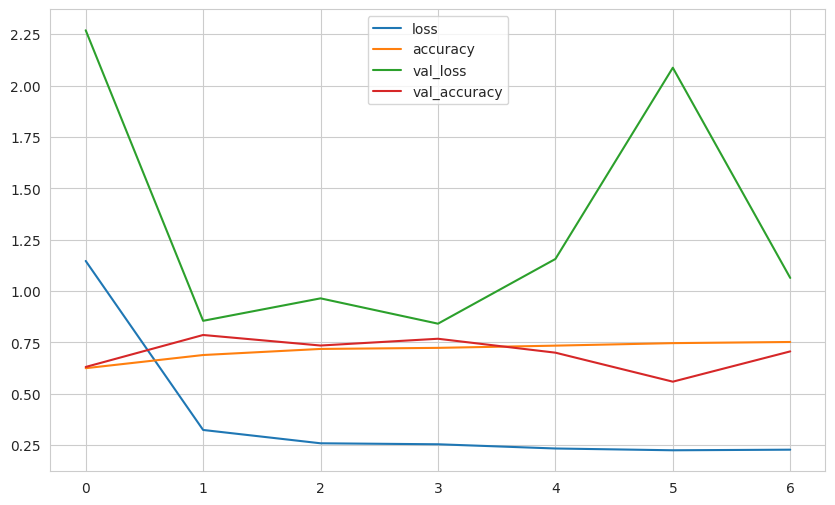

In [64]:
summary.plot();

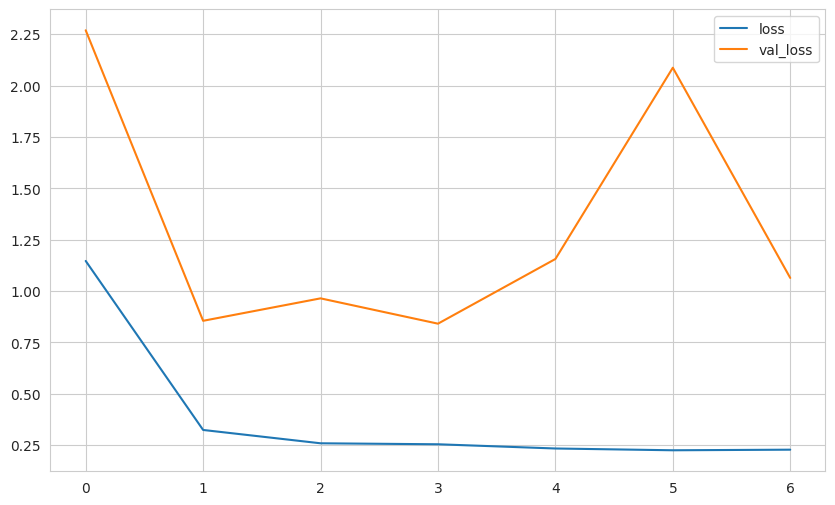

In [65]:
summary[["loss", "val_loss"]].plot();

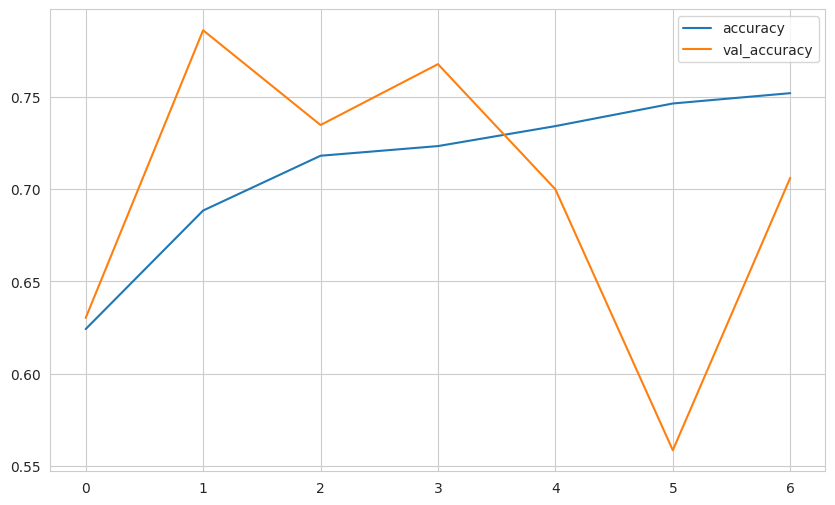

In [66]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [67]:
model_6.evaluate(X_test, Y_test)

329/329 [==============================] - 2s 5ms/step - loss: 0.8735 - accuracy: 0.7727


[0.8734569549560547, 0.7726666927337646]

In [68]:
score = model_6.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8734569549560547
Test accuracy: 0.7726666927337646


In [69]:
pred_prob = model_6.predict(X_test)
pred_prob

329/329 [==============================] - 1s 2ms/step


array([[0.00000023, 0.00000007, 0.00000015, ..., 0.00653824, 0.00005976,
        0.00005651],
       [0.00003052, 0.00035281, 0.00911843, ..., 0.00000407, 0.00150475,
        0.00000318],
       [0.        , 0.        , 0.        , ..., 0.00000073, 0.00000008,
        0.00000015],
       ...,
       [0.00000002, 0.        , 0.00000001, ..., 0.0000534 , 0.00000908,
        0.00000471],
       [0.00022267, 0.00000927, 0.00005094, ..., 0.0014612 , 0.9949586 ,
        0.00004202],
       [0.00000492, 0.000004  , 0.00001751, ..., 0.00090207, 0.00009142,
        0.9970252 ]], dtype=float32)

In [70]:
pred_prob.shape

(10500, 10)

In [71]:
pred_prob[0]

array([0.00000023, 0.00000007, 0.00000015, 0.00000202, 0.00000023,
       0.993342  , 0.00000083, 0.00653824, 0.00005976, 0.00005651],
      dtype=float32)

In [72]:
np.argmax(pred_prob[0])

5

In [73]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([5, 4, 5, ..., 5, 8, 9])

In [74]:
y_pred.shape

(10500,)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1050
           1       0.99      0.94      0.97      1050
           2       0.93      0.19      0.31      1050
           3       0.87      0.85      0.86      1050
           4       0.55      0.91      0.68      1050
           5       0.77      0.99      0.86      1050
           6       0.45      0.61      0.52      1050
           7       0.91      0.70      0.79      1050
           8       0.89      0.98      0.93      1050
           9       0.96      0.90      0.93      1050

    accuracy                           0.77     10500
   macro avg       0.82      0.77      0.76     10500
weighted avg       0.82      0.77      0.76     10500



In [76]:
print(confusion_matrix(y_test, y_pred))

[[ 706    0    0   46   24    0  228    0   46    0]
 [   0  986    0   27   31    0    4    0    2    0]
 [   4    0  197    3  418    0  408    0   20    0]
 [   4    1    0  892   72    1   65    0   15    0]
 [   0    0    7   23  955    1   61    0    3    0]
 [   1    0    0    0    0 1039    0    6    2    2]
 [ 107    3    8   29  236    0  638    0   29    0]
 [   0    0    0    0    0  283    0  730    1   36]
 [   0    0    0    0   14    3    9    0 1024    0]
 [   0    1    0    1    0   30    0   65    7  946]]


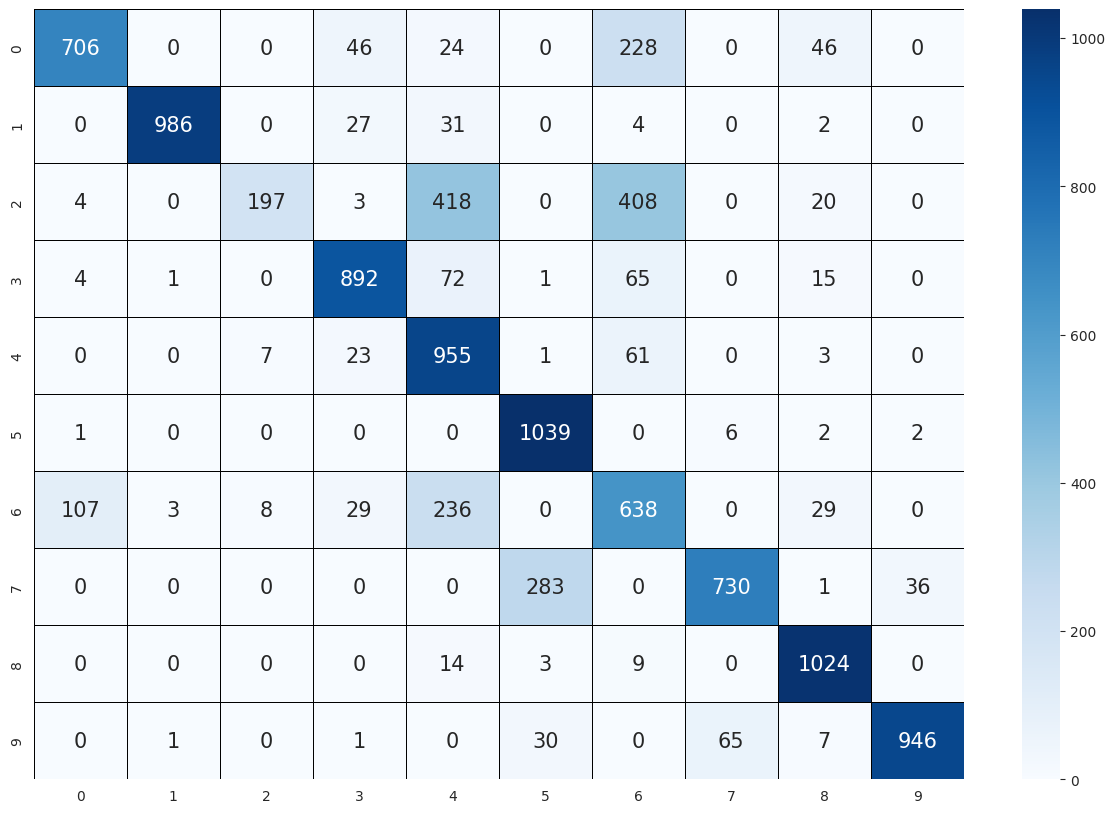

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [78]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [79]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

2387

In [80]:
np.equal(y_test, y_pred).sum()

8113

In [81]:
model_6_acc = score[1]
model_6_loss = score[0]
print("Results of the Model 6:")
print(f"Accuracy: {model_6_acc}, loss: {model_6_loss}")


Results of the Model 6:
Accuracy: 0.7726666927337646, loss: 0.8734569549560547


# Compare Models

In [108]:
compare = pd.DataFrame({"Model":
                                ["Model 1","Model 2","Model 3",
                                 "Model 4","Model 5","Model 6",],

                       "Accuracy":
                                  [model_1_acc, model_2_acc, model_3_acc,
                                   model_4_acc, model_5_acc, model_6_acc],

                        "Loss":
                                 [model_1_loss, model_2_loss, model_3_loss,
                                  model_4_loss, model_5_loss, model_6_loss],
                        }
                       )

In [109]:
csv_file_path = '/content/SaveModelsResults.csv'

In [110]:
# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [111]:
# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)
compare

,Model,Accuracy,Loss
0,Model 1,0.915,0.823
1,Model 2,0.910,0.338
2,Model 3,0.912,0.319
3,Model 4,0.915,0.260
4,Model 5,0.921,0.284
5,Model 6,0.773,0.873


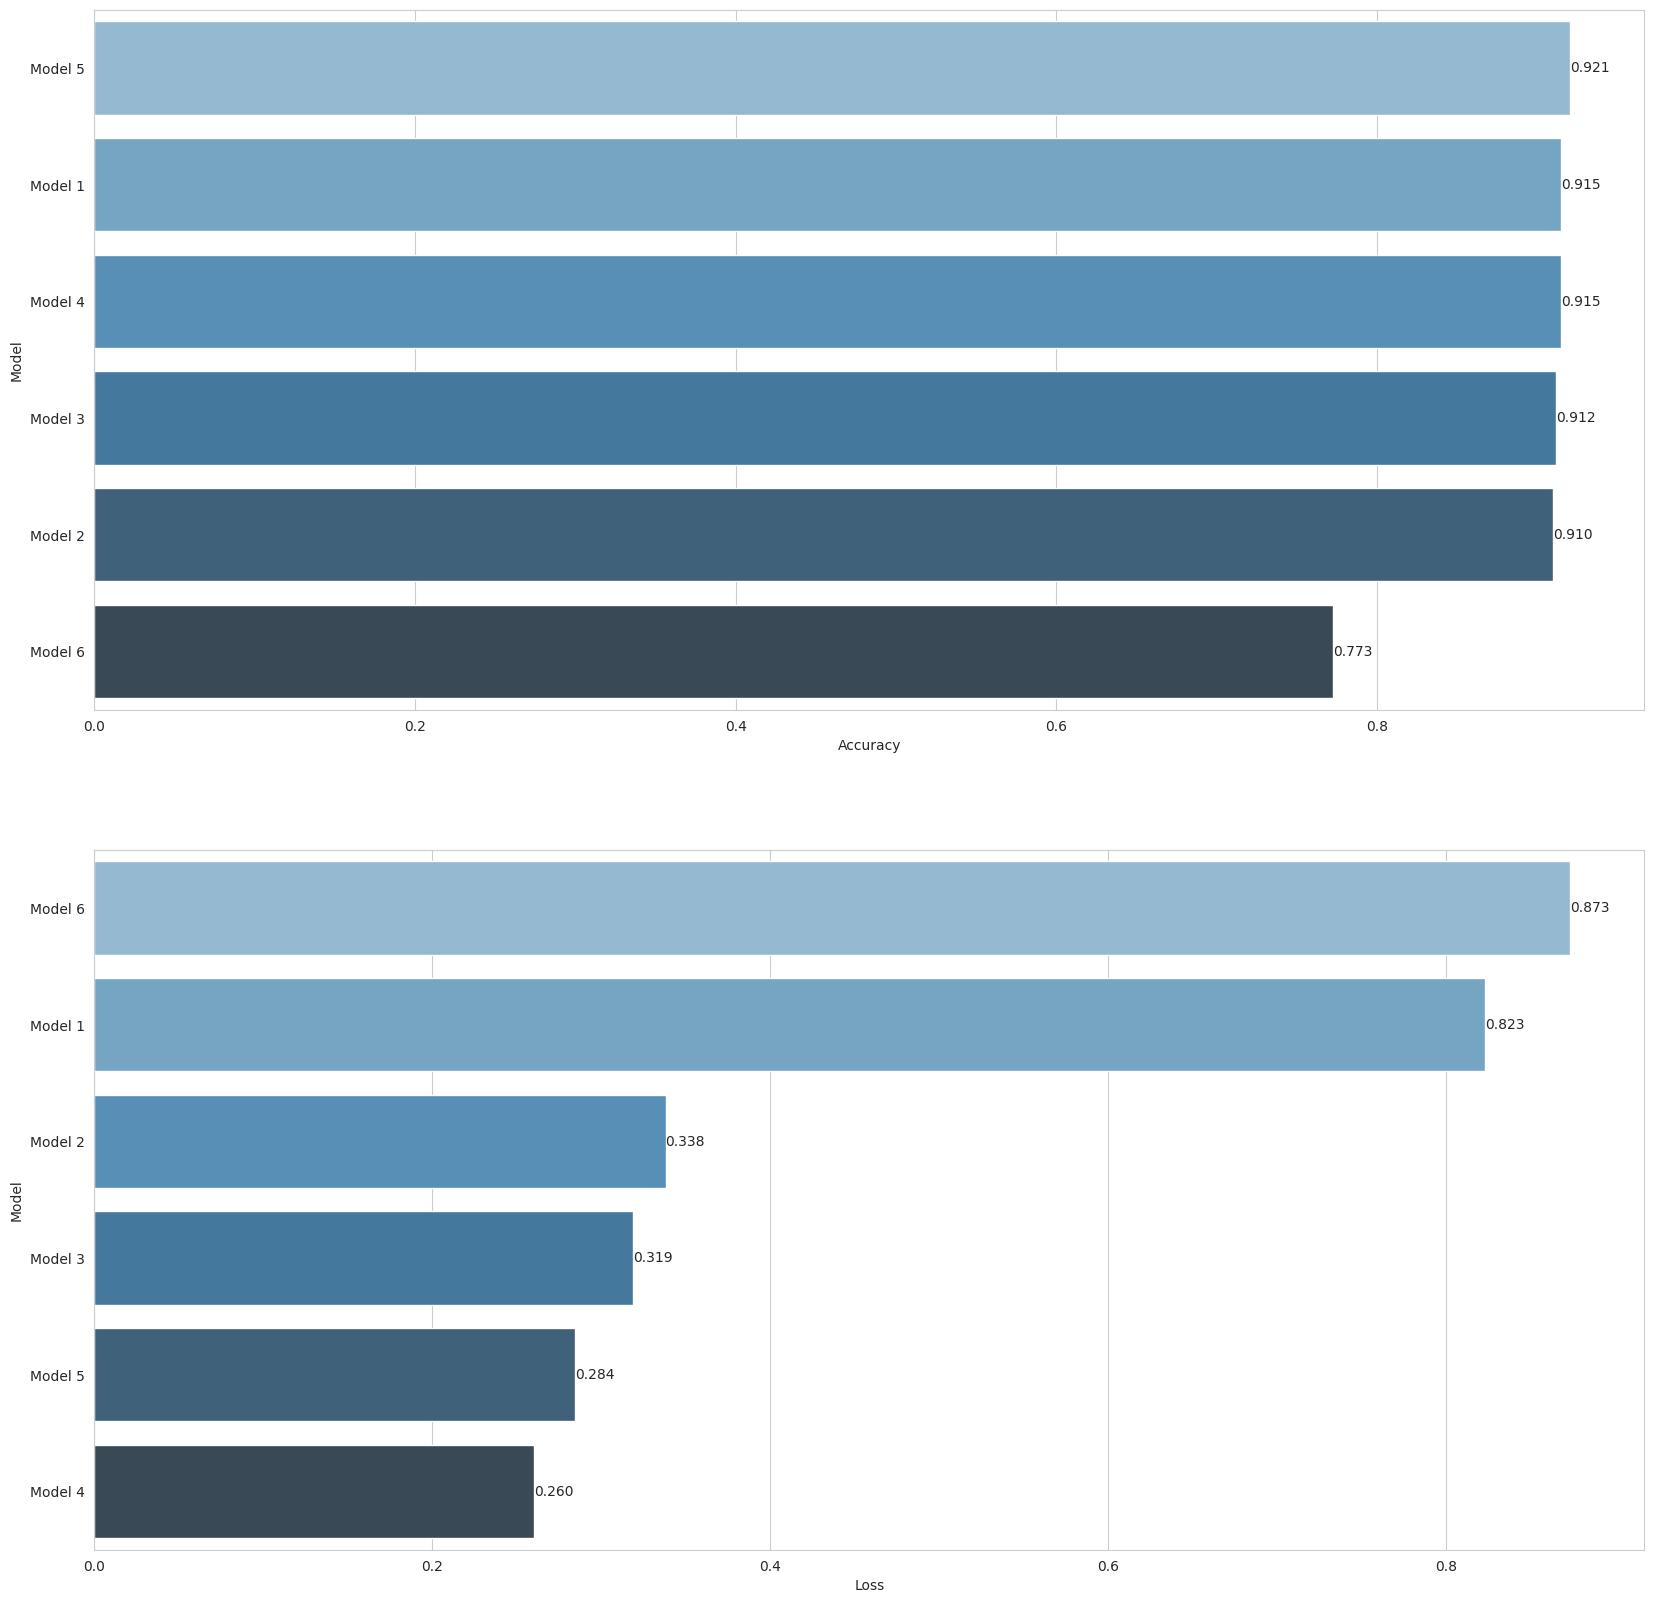

In [112]:
def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(20,20))
plt.subplot(211)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Loss", ascending=False)
ax=sns.barplot(x="Loss", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)


plt.show()

In [113]:
#the best model is model 5
best_model = load_model("CNN_model_5.h5")
best_model.save("CNN_BestModel_GrayImgClassification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction

In [115]:
# load the best model
best_model = load_model("CNN_BestModel_GrayImgClassification.h5")

In [116]:
#Example 1
my_clothe_1 = X_test[10]

In [117]:
my_clothe_1.shape

(28, 28, 1)

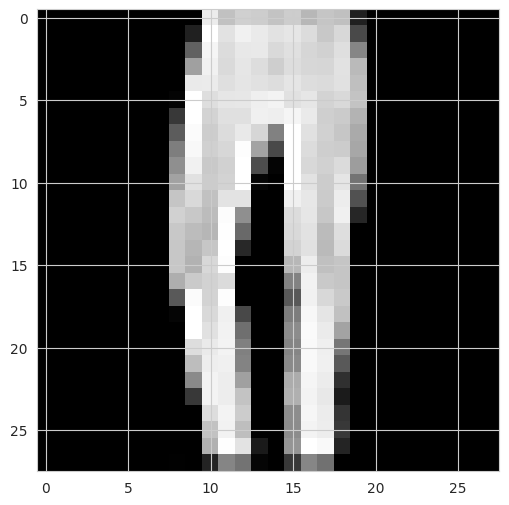

In [118]:
plt.imshow(my_clothe_1, cmap="gray")
plt.show()

In [119]:
np.expand_dims(my_clothe_1, 0).shape

(1, 28, 28, 1)

In [123]:
pred_prob = best_model.predict(np.expand_dims(my_clothe_1, 0))
pred_prob

1/1 [==============================] - 0s 151ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [124]:
# Pridicted value
y_pred = np.argmax(pred_prob)
y_pred

1

In [125]:
# Pridicted value
classes[int(y_pred)]

'Trouser'

In [128]:
#Example 2
my_clothe_2 =X_test[24]

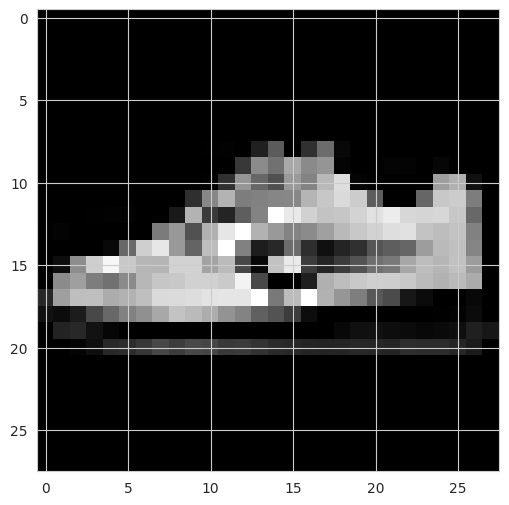

In [129]:
plt.imshow(X_test[24].reshape(28, 28), cmap="gray")
plt.show()

In [130]:
pred = best_model.predict(np.expand_dims(my_clothe_2, 0))

1/1 [==============================] - 0s 55ms/step


In [131]:
# Pridicted value
y_pred=np.argmax(pred)
y_pred

7

In [132]:
# Pridicted value
classes[int(y_pred)]

'Sneaker'

# End of Assignment

# ___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___